![alt text](images/8.1-10.png)

# *(a) Define the test statistic and critical region for $\alpha = 0.05$. Sketch a figure showing the critical region*
---

 $\large n < 30\ and\  \sigma\  is\ unkown,\ so\ we\ use\ Student\ T\ distribution\$

$\large test\ statistic\ t = \frac{\bar{X} - \mu_{0}}{\frac{s}{ \sqrt{n}}}$

$\large critical\ region:\ t_{1 - \alpha}(n - 1)$

In [1]:
from helper import *

m0 = 5.70
n = 8
alpha = .05

criticalRegion = scipy.stats.t.ppf(1 - alpha, n - 1)
print(f"Lower Bound of Critical Region: {criticalRegion} ≈ {criticalRegion:.4}")

criticalRegion = float(round(criticalRegion, 3))
print(f"Critical Region: [{criticalRegion}, {math.inf})")

Lower Bound of Critical Region: 1.894578605061305 ≈ 1.895
Critical Region: [1.895, inf)


IndexError: list index out of range

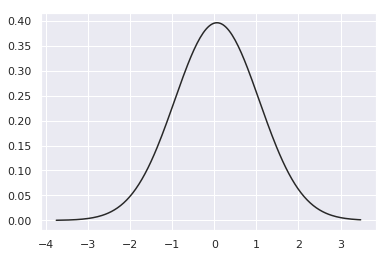

In [2]:
sns.set()
np.random.seed(0)
plt = sns.distplot(np.random.randn(100), kde=False, fit=scipy.stats.norm, hist=False)


# plt.fill_between(plt.lines[0], plt.lines[1])

---
# *(b) Calculate the value of the Test Statistic and support your claim from part (a)*

In [3]:
# Load in sample data from problem
samples = load_sample_data(8,1,10, display=True)

# Calculate sample mean, sample variance and test statistic
xBar = sample_mean(samples)
s = sample_variance(samples) ** .5
m0 = 5.70
n = len(samples)
testStat = (xBar - m0) / (s / n ** .5)

# Display values
print()
print("=="*15)
print(f"Sample Mean: {xBar}  ≈  {xBar:.5}")
print(f"Sample Standard Deviation: {s}  ≈ {s:.4}")
print(f"Test Statistic: {testStat}  ≈  {testStat:.5}")

# Round to the nearest thousanth
xBar = round(xBar, 4)
s = round(s, 4)
testStat = round(testStat, 4)


# xBar, s, testStat, criticalRegion 

Loaded E8_1-10.txt sucessfully.
[5.71 5.8  6.03 5.87 6.22 5.92 5.57 5.83]

Sample Mean: 5.86875  ≈  5.8688
Sample Standard Deviation: 0.19737111526983148  ≈ 0.1974
Test Statistic: 2.4182721805487803  ≈  2.4183


$\large t \approx 2.4183\  and\ is\ within\ rejection\ region\  [1.8946, \infty)$
$\large 1.895 < 2.4183 < \infty$
# *Therefore we reject $H_0$*

---

# *(c) Approximate the p-value and provide its bounds*

### *The p-value is the probability of obtaining the value of the test statistic or greater(or less than if negative). We use the Student T distribution to approximate this probability within the respected degrees of freedom.*

$\Large P(\ t(n-1) \geq 2.183) \\ \Large = P(\ t(n-1) > 2.183) \\ \Large = 1 - P(\ t(n-1) \leq 2.183) \\ \Large = 1 - P(\ t(n-1) < 2.183)$

In [4]:
pVal = 1 - scipy.stats.t.cdf(testStat, n - 1)
print(f"P-value: {pVal}  ≈  {pVal:.4}")
pVal = round(pVal,4)

P-value: 0.023103679733782467  ≈  0.0231


---
<p align="center">
    <img src="images/8.1-12.png" width="500px" height="300px"/>
</p>

In [8]:
mD = 0
n = 17
alpha = .05

# Load the data sample data from text file
# Reshape array and 
samples = load_sample_data(8,1,12, True)
samples = np.reshape(samples, (17, 3)).T

# Split the data accordingly,
# x = Distance Ball A
# y = Distance Ball B
# d = Correct difference ( dist A - dist B)
x, y, d = (samples[0]), (samples[1]), (samples[2]) 

Loaded E8_1-12.txt sucessfully.
[265 252  13 272 276  -4 246 243   3 260 246  14 274 275  -1 263 246  17
 255 244  11 258 245  13 276 259  17 274 260  14 274 267   7 269 267   2
 244 251  -7 212 222 -10 235 235   0 254 255  -1 224 231  -7]


## *We are performing a paired t-test. Must take the difference to find distribution D.*
$\large d_1 = x_1 - y_1, ... , d_n = x_n - y_n$

## *The formula for Test Statistic t looks awfully familar*
$\large test\ statistic\ t = \frac{\bar{d} - \mu_d}{\frac{s_d}{\sqrt{n}}}$


In [6]:
# if difference is correct find sample mean/variance and test Statistic 
if (x - y).all() == d.all():
    dBar = sample_mean(d)
    dStd = sample_variance(d) ** .5
    testStatistic = (dBar - mD) / (dStd / n ** .5)

    # Print results
    print(f"Sample Mean: {dBar} ≈ {dBar:.4}")
    print(f"Sample Standard Deviation: {dStd} ≈ {dStd:.4}")
    print(f"Test Statistic = {testStatistic} ≈  {testStatistic:.4}")
    
    # Round to approximations
    dBar = round(dBar, 3)
    dStd = round(dStd, 3)
    testStatistic = round(testStatistic, 4)
# dBar, dStd, testStatistic

Sample Mean: 4.764705882352941 ≈ 4.765
Sample Standard Deviation: 9.086593226869367 ≈ 9.087
Test Statistic = 2.162018826797583 ≈  2.162


#### *We need to compare test statistic t to $t_{1-\alpha}(n-1)$, the critical region* 

In [7]:
criticalRegion = scipy.stats.t.ppf(1 - alpha, n - 1)
print(f"Lower bound of Critical Region: {criticalRegion} ≈ {criticalRegion:.4}")
print(f"Critical Region: [{criticalRegion:.4}, {math.inf})")
criticalRegion = round(criticalRegion, 3)

Lower bound of Critical Region: 1.74588367627624 ≈ 1.746
Critical Region: [1.746, inf)


$\large 2.162\ is\ within\ critical\ region\ [1.746, \infty) \\ \Large Therefor\ we\ reject\ H_0$

---
![alt text](images/8.2-4.png)